# Billionaires Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Billionaire.csv")

In [3]:
data.head(20)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


In [4]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [5]:
data['Age'+'_NAN'] = np.where(data.Age.isnull(),1,0)
data

,Name,NetWorth,Country,Source,Rank,Age,Industry,Age_NAN
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,0
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,0


In [6]:
data.loc[data['Age_NAN']==1].index

Int64Index([ 132,  255,  268,  285,  294,  363,  365,  369,  394,  441,  483,
             500,  529,  557,  605,  623,  696,  728,  747,  769,  786,  789,
             816,  831,  884,  947,  963, 1094, 1111, 1158, 1186, 1244, 1265,
            1296, 1306, 1319, 1341, 1345, 1444, 1454, 1489, 1495, 1505, 1520,
            1568, 1636, 1694, 1730, 1747, 1792, 1821, 1858, 1885, 1939, 1940,
            2008, 2016, 2038, 2049, 2051, 2114, 2171, 2182, 2183, 2197, 2198,
            2241, 2284, 2406, 2482, 2498, 2534, 2576, 2577, 2580, 2639, 2680,
            2714, 2720],
           dtype='int64')

### Random sample imputation


In [7]:
data['Age'+'_random'] = data['Age']
random_sample = data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0)
random_sample.index = data[data['Age'].isnull()].index
data.loc[data['Age'].isnull(),'Age'+'_random'] = random_sample
data

,Name,NetWorth,Country,Source,Rank,Age,Industry,Age_NAN,Age_random
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,0,57.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,0,49.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,0,72.0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,0,65.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,0,36.0
...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,0,49.0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,0,65.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,0,58.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,0,58.0


In [8]:
data = data.drop(['Age'],axis=1)
data

,Name,NetWorth,Country,Source,Rank,Industry,Age_NAN,Age_random
0,Jeff Bezos,$177 B,United States,Amazon,1,Technology,0,57.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive,0,49.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,Fashion & Retail,0,72.0
3,Bill Gates,$124 B,United States,Microsoft,4,Technology,0,65.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology,0,36.0
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,Technology,0,49.0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,Manufacturing,0,65.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,Metals & Mining,0,58.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,Diversified,0,58.0


In [9]:
data.isnull().sum()

Name          0
NetWorth      0
Country       0
Source        0
Rank          0
Industry      0
Age_NAN       0
Age_random    0
dtype: int64

In [10]:
data.head()

,Name,NetWorth,Country,Source,Rank,Industry,Age_NAN,Age_random
0,Jeff Bezos,$177 B,United States,Amazon,1,Technology,0,57.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive,0,49.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,Fashion & Retail,0,72.0
3,Bill Gates,$124 B,United States,Microsoft,4,Technology,0,65.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology,0,36.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2755 non-null   object 
 1   NetWorth    2755 non-null   object 
 2   Country     2755 non-null   object 
 3   Source      2755 non-null   object 
 4   Rank        2755 non-null   int64  
 5   Industry    2755 non-null   object 
 6   Age_NAN     2755 non-null   int32  
 7   Age_random  2755 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 161.6+ KB


## Networth is an object

In [12]:
data['NetWorth'] = data['NetWorth'].str.strip("$")
data['NetWorth'] = data['NetWorth'].str.strip("B")
data['NetWorth'] = data['NetWorth'].astype(float)
data

,Name,NetWorth,Country,Source,Rank,Industry,Age_NAN,Age_random
0,Jeff Bezos,177.0,United States,Amazon,1,Technology,0,57.0
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,Automotive,0,49.0
2,Bernard Arnault & family,150.0,France,LVMH,3,Fashion & Retail,0,72.0
3,Bill Gates,124.0,United States,Microsoft,4,Technology,0,65.0
4,Mark Zuckerberg,97.0,United States,Facebook,5,Technology,0,36.0
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,Technology,0,49.0
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,Manufacturing,0,65.0
2752,Zhao Meiguang,1.0,China,gold mining,2674,Metals & Mining,0,58.0
2753,Zhong Naixiong,1.0,China,conglomerate,2674,Diversified,0,58.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2755 non-null   object 
 1   NetWorth    2755 non-null   float64
 2   Country     2755 non-null   object 
 3   Source      2755 non-null   object 
 4   Rank        2755 non-null   int64  
 5   Industry    2755 non-null   object 
 6   Age_NAN     2755 non-null   int32  
 7   Age_random  2755 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 161.6+ KB


### Top 10 billionaires according to networth 

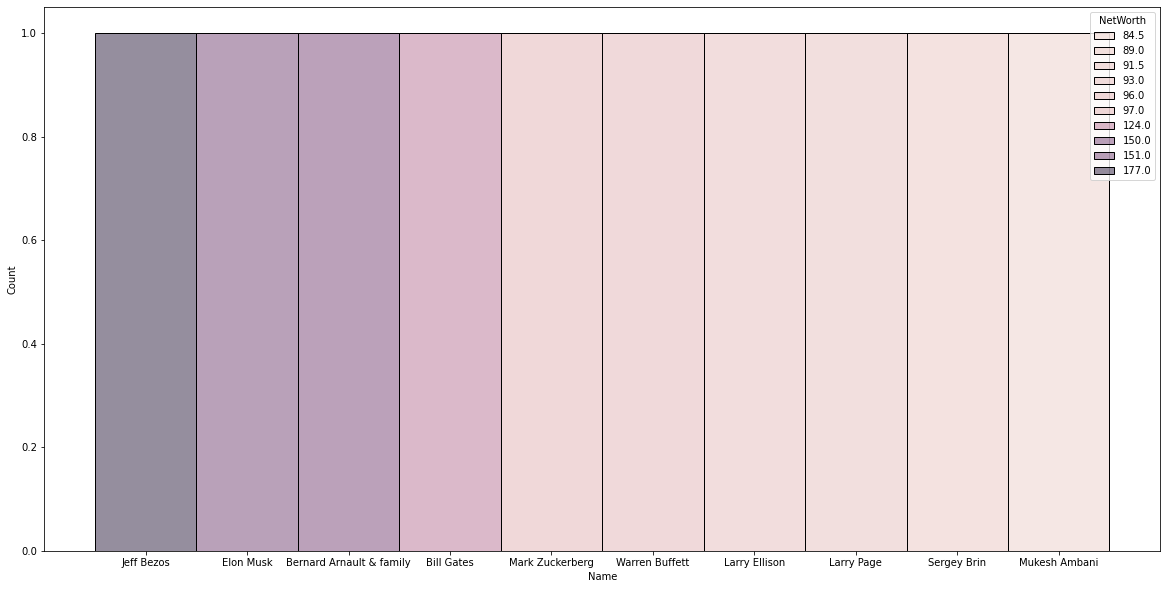

In [14]:
df = data.sort_values(by = ["NetWorth"],ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.histplot(x="Name",hue ="NetWorth", data=df)
plt.show()

### Top 5 domains with most number of billionaires

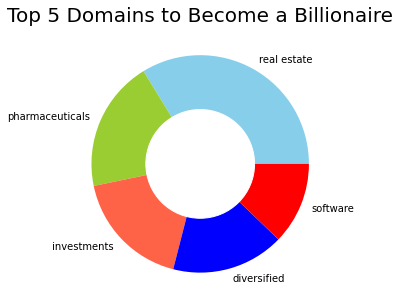

In [15]:
a = data["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Domains to Become a Billionaire", fontsize=20)
plt.show()

### Top 5 industry with most number of billionaires

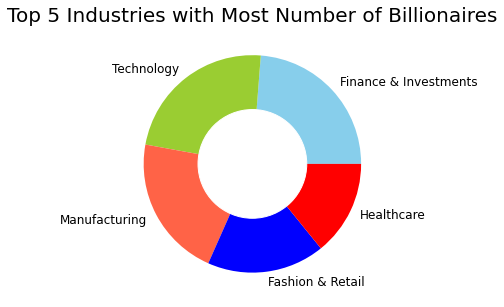

In [16]:
a = data["Industry"].value_counts().head()
index = a.index
industries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(industries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Industries with Most Number of Billionaires", fontsize=20)
plt.show()

### Top 5 countries with most number of billionaires

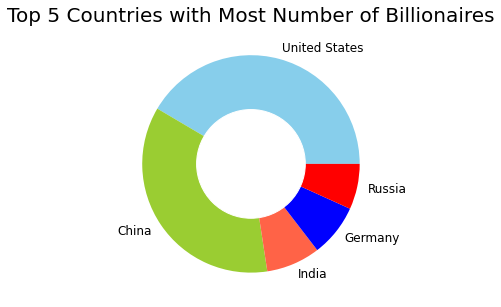

In [17]:
a = data["Country"].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Countries with Most Number of Billionaires", fontsize=20)
plt.show()

#### The visualization shows that United stated and China are the countries where most people become billionaires

## Summary

The success of a business or startup depends a lot on the business environment of a country. At the end of the analysis of
global billionaires, I found that China and the United States are the countries with the most billionaires which concludes that the business environment and the success rate of a startup is much better in the US and China than in the rest of the world